## Importing Libraries

In [2]:
import sys
import numpy as np
import pandas as pd
from skimage.io import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.preprocessing import image

from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

## Making Folders and Setting Directories

In [3]:
DATA_PATH= os.path.join('data/')
TRAIN_PATH=os.path.join(DATA_PATH,'train')
VAL_PATH=os.path.join(DATA_PATH,'validation')
SAV_PATH=os.path.join(DATA_PATH, 'resized-data')

In [54]:
os.makedirs(TRAIN_PATH)
os.makedirs(VAL_PATH)
os.makedirs(SAV_PATH)

In [4]:
print (os.listdir(TRAIN_PATH))

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard']


In [5]:
print (os.listdir(VAL_PATH))

['lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


## Loading the training and validation datasets

In [6]:
for directory in os.listdir(TRAIN_PATH):
    file= os.listdir(os.path.join(TRAIN_PATH,directory))[0]
    img=cv2.imread(os.path.join(TRAIN_PATH,directory,file))
    print(f'File: {file}, Size: {img.shape} Feature: {img.flatten()}')

File: 02f4b3be2d.jpg, Size: (1025, 1640, 3) Feature: [165 186 194 ... 126 169 188]
File: 00f56e5c92.jpg, Size: (1200, 1200, 3) Feature: [ 25  43  54 ...  97 126 110]
File: 003bd60fa9.jpg, Size: (168, 300, 3) Feature: [ 3  3  3 ... 75 74 76]
File: 039b2ae790.jpg, Size: (1600, 1061, 3) Feature: [ 18  27  40 ...  98 117 132]
File: 0d562e4829.jpg, Size: (183, 275, 3) Feature: [ 93 126 119 ...   2  33   4]
File: 02b34c63a2.jpg, Size: (168, 300, 3) Feature: [213 211 211 ... 246 246 246]
File: 02116e752c.jpg, Size: (464, 768, 3) Feature: [105 112 121 ...  66 100  76]
File: 0903d0db72.jpg, Size: (183, 275, 3) Feature: [ 18  31  17 ... 217 215 215]
File: 016caf0681.jpg, Size: (168, 300, 3) Feature: [ 12 156 104 ... 192 240 242]
File: 00357563a7.jpg, Size: (698, 1240, 3) Feature: [109 133 163 ... 151 186 212]
File: 01ee56d7db.jpg, Size: (650, 975, 3) Feature: [204 206 206 ... 155 160 163]
File: 00981a3b70.jpg, Size: (168, 299, 3) Feature: [ 93 232 221 ...  66 105  89]
File: 01af9577d7.jpg, Size:

In [25]:
def loadimgs(path, n=0):
    '''path=> Path of the train or test directory'''
    X=[]
    y=[]
    cat_dict={}
    curr_y = n
    # We load every animal separately so we can isolate them later
    for animal in os.listdir(path):
        print("Loading animal:", animal)
        cat_dict[animal]=(curr_y)
        category_images=[]
        animal_image_path=os.path.join(path,animal)
        for filename in os.listdir(animal_image_path):
            image_path=os.path.join(animal_image_path, filename)
            image=cv2.imread(image_path)
            resized=cv2.resize(image, (64,64),interpolation=cv2.INTER_AREA)
            rescaled=1.0/255*resized
            category_images.append(rescaled)
            y.append(curr_y)
        try:
            X.append(np.stack(category_images))
        except ValueError as e:
            print(e)
            print("Error-Category_images:", category_images)
        curr_y+=1
    y=np.vstack(y)
    X=np.stack(X)
    print("Loading Complete")
    return X,y,cat_dict

In [26]:
X,y,c=loadimgs(TRAIN_PATH)

Loading animal: antelope
Loading animal: badger
Loading animal: bat
Loading animal: bear
Loading animal: bee
Loading animal: beetle
Loading animal: bison
Loading animal: boar
Loading animal: butterfly
Loading animal: cat
Loading animal: caterpillar
Loading animal: chimpanzee
Loading animal: cockroach
Loading animal: cow
Loading animal: coyote
Loading animal: crab
Loading animal: crow
Loading animal: deer
Loading animal: dog
Loading animal: dolphin
Loading animal: donkey
Loading animal: dragonfly
Loading animal: duck
Loading animal: eagle
Loading animal: elephant
Loading animal: flamingo
Loading animal: fly
Loading animal: fox
Loading animal: goat
Loading animal: goldfish
Loading animal: goose
Loading animal: gorilla
Loading animal: grasshopper
Loading animal: hamster
Loading animal: hare
Loading animal: hedgehog
Loading animal: hippopotamus
Loading animal: hornbill
Loading animal: horse
Loading animal: hummingbird
Loading animal: hyena
Loading animal: jellyfish
Loading animal: kangaroo

In [27]:
with open(os.path.join(SAV_PATH,"train.pickle"),"wb") as f:
    pickle.dump((X,c),f)

In [28]:
X.shape
# 46 categories of animal, each containg 60 images and of dimensions 64*64*3

(46, 60, 64, 64, 3)

In [29]:
y.shape

(2760, 1)

In [30]:
c.keys()

dict_keys(['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard'])

In [175]:
c


{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45}

In [32]:
Xval, yval,cval=loadimgs(VAL_PATH)

Loading animal: lion
Loading animal: lizard
Loading animal: lobster
Loading animal: mosquito
Loading animal: moth
Loading animal: mouse
Loading animal: octopus
Loading animal: okapi
Loading animal: orangutan
Loading animal: otter
Loading animal: owl
Loading animal: ox
Loading animal: oyster
Loading animal: panda
Loading animal: parrot
Loading animal: pelecaniformes
Loading animal: penguin
Loading animal: pig
Loading animal: pigeon
Loading animal: porcupine
Loading animal: possum
Loading animal: raccoon
Loading animal: rat
Loading animal: reindeer
Loading animal: rhinoceros
Loading animal: sandpiper
Loading animal: seahorse
Loading animal: seal
Loading animal: shark
Loading animal: sheep
Loading animal: snake
Loading animal: sparrow
Loading animal: squid
Loading animal: squirrel
Loading animal: starfish
Loading animal: swan
Loading animal: tiger
Loading animal: turkey
Loading animal: turtle
Loading animal: whale
Loading animal: wolf
Loading animal: wombat
Loading animal: woodpecker
Load

In [33]:
with open(os.path.join(SAV_PATH,"val.pickle"),"wb") as f:
    pickle.dump((Xval,cval),f)

In [34]:
Xval.shape

(44, 60, 64, 64, 3)

In [35]:
yval.shape

(2640, 1)

In [36]:
cval.keys()

dict_keys(['lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'])

## Loading the saved pickle data

In [45]:
with open(os.path.join(SAV_PATH, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(train_classes.keys()))

Training alphabets: 

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard']


In [47]:
with open(os.path.join(SAV_PATH, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Validation alphabets:

['lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [102]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape[0], X.shape[1], X.shape[2], X.shape[3]

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,3)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 3)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,3)
    
    return pairs, targets

In [49]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [157]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape[0], X.shape[1], X.shape[2], X.shape[3]
    
    indices = rng.randint(0, n_examples,size=(N,))
    categories = rng.choice(range(n_classes),size=(N,),replace=False)
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))

    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,3)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,3)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [131]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w = X.shape[0], X.shape[1], X.shape[2]
    X = X.reshape(nc, h, w,3)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h,3))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [132]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(64,64,3))
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

Indices [ 4 35 55 10  4 26  1  5 40 29 51 32 55 42 56 20]
Category [32 39 27 26  8 18 30 15 44 29  3 34 19  1 33 24]
EX 1 48
EX 2 42


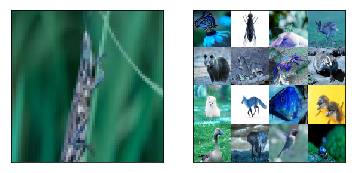

In [133]:
pairs, targets = make_oneshot_task(16,"train")
plot_oneshot_task(pairs)

## Siamese Model

In [163]:
def initialize_weights(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [168]:
def initialize_bias(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [169]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape,
                    kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(256, activation='sigmoid',kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    model.add(Dense(256, activation='sigmoid',kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [170]:
model = get_siamese_model((64, 64, 3))
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential_7 (Sequential)      (None, 256)          536160      ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
 lambda_5 (Lambda)              (None, 256)          0           ['sequential_7[0][0]',     

In [171]:
optimizer = Adam(learning_rate = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

In [159]:
model_path = './weights/'
os.makedirs(model_path)

In [172]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [173]:
# Hyper parameters
evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 20000 # No. of training iterations
N_way = 20 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

In [174]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

Starting training process!
-------------------------------------

 ------------- 

Time for 200 iterations: 0.49356526931126915 mins
Train Loss: 0.7008431553840637
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 5.6% 20 way one-shot learning accuracy 

Current best: 5.6, previous best: -1

 ------------- 

Time for 400 iterations: 1.2149581034978232 mins
Train Loss: 0.6944068670272827
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 3.6% 20 way one-shot learning accuracy 


 ------------- 

Time for 600 iterations: 1.9713544845581055 mins
Train Loss: 0.6933534741401672
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 4.4% 20 way one-shot learning accuracy 



KeyboardInterrupt: 